<a href="https://colab.research.google.com/github/AkhilVinayakp/HAR_LSTM_CNN/blob/main/dataPreparations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
# changing the working directory 
# os.chdir('content/drive/MyDrive/datasets/wisdm_cln.csv')
%cd /content/drive/My\ Drive/datasets 
%pwd

/content/drive/My Drive/datasets


'/content/drive/My Drive/datasets'

In [1]:
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np


In [3]:
df = pd.read_csv('data/wisdm_cln.csv')

In [4]:
df.shape

(1098204, 6)

In [5]:
# solving missing values problem via linear interpolation
df.interpolate(method='linear', inplace=True)

In [6]:
# normalizing the values
# converting the dataframe to features and target
from sklearn.preprocessing import normalize
target = df['activity'].values
target = target.reshape(-1,1)
print(target.shape)
# creating feature matrix
features = df[['x-axis', 'y-axis', 'z-axis']].values
features.shape
normalize(features, copy=False)

(1098204, 1)


array([[-0.05465478,  0.9977177 ,  0.03965151],
       [ 0.4053382 ,  0.91090953,  0.07710237],
       [ 0.41078201,  0.91170789, -0.00684637],
       ...,
       [ 0.9723227 , -0.14777592,  0.18097196],
       [ 0.96979324, -0.15732201,  0.18641581],
       [ 0.97344432, -0.1457974 ,  0.17649159]])

In [7]:
# plot function
def plot_series(time, series, start , stop):
    fig, (ax1, ax2, ax3) = plt.subplots(3)
    fig.set_figheight(10)
    fig.set_figwidth(30)
    fig.suptitle('Vertically stacked subplots')
    ax1.plot(time, series[start:stop,0], 'tab:red')
    ax1.set_title('x-axis')
    ax2.plot(time, series[start:stop,1], 'tab:green')
    ax2.set_title("y-axis")
    ax3.plot(time,series[start:stop, 2],'tab:blue')
    ax3.set_title("z-axis")

Walking


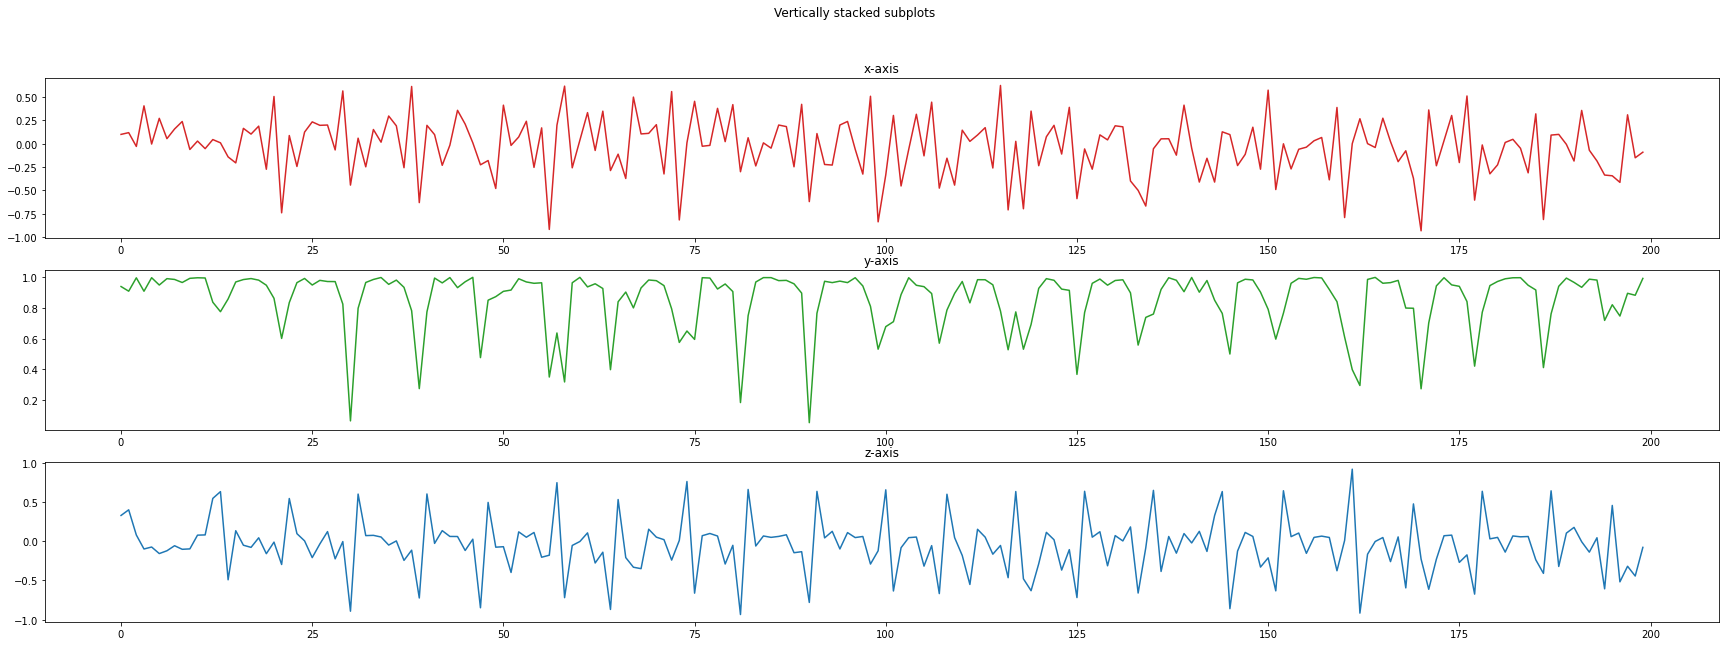

In [8]:
print("Walking")
t =np.arange(200)
plot_series(t,features,597,797)

In [9]:
# applying windowing
df.shape

(1098204, 6)

In [10]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [11]:
(df['user'].unique())

array([33, 17, 20, 29, 13, 15,  6, 27, 36, 18, 32, 35, 11, 16,  5, 10, 28,
       26, 14, 24, 12, 23,  4, 30, 34,  8, 31, 21,  3, 22,  1,  9, 25,  2,
        7, 19], dtype=int64)

In [ ]:
# spltting for training and testing by using user values
# user 1 to 27 for training
# user 28 to 36 for testing

# testing 
# user 1 to 12 for training 
# user 30 to 36 for testing

In [12]:
# droping timestamp 
df.drop(['timestamp'],axis = 1, inplace = True)

In [13]:
df

,user,activity,x-axis,y-axis,z-axis
0,33,Jogging,-0.694638,12.680544,0.503953
1,33,Jogging,5.012288,11.264028,0.953424
2,33,Jogging,4.903325,10.882658,-0.081722
3,33,Jogging,-0.612916,18.496431,3.023717
4,33,Jogging,-1.184970,12.108489,7.205164
...,...,...,...,...,...
1098199,19,Sitting,9.000000,-1.570000,1.690000
1098200,19,Sitting,9.040000,-1.460000,1.730000
1098201,19,Sitting,9.080000,-1.380000,1.690000
1098202,19,Sitting,9.000000,-1.460000,1.730000


In [15]:
df.to_csv('data/inter.csv', index=False)